In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
from uuid import uuid4 as uuid  # this is a randomly generated ID

# Below are my scrapers

### scraperXLimproved scrapes pages from home page (and following pages)

In [ ]:
def scraperXLimproved(site):
    # function for scraping reddit. A few assists from Ben Shaver in when I went to
    # him with questions. Mainly on re.compile, that this syntax worked: soup_object['thing I want to grab']
    # and helping me think through how to deal with the URL to get to the next page
    # without having to use selenium
    col = ["postid",'author','subr','comments','authorhex','domain','timestamp','score','time_scraped','title','hours_ago','rank']
    df = pd.DataFrame(columns=col)
    html = requests.get(site)
    
    for i in range(1,101):
        b = BeautifulSoup(html.text)

        for thing in b.find_all(name = 'div', class_ = (re.compile('thing id'))):
            postid = thing['data-fullname']
            try:
                author= thing['data-author']
            except:
                author = 'TK'
            try:
                subr = thing['data-subreddit']
            except:
                subr = 'TK'
            try:
                comments = thing['data-comments-count']
            except:
                comments = 'TK'
            try:
                authorhex = thing['data-author-fullname']
            except:
                authorhex = 'TK'
            try:
                domain = thing['data-domain']
            except:
                domain = 'TK'
            try:
                timestamp = int(int(thing['data-timestamp'])/1000)
            except:
                timestamp = 'TK'
            try:
                score = thing['data-score']
            except:
                score = 'TK'
            try:
                time_scraped = int(time.time())
            except:
                time_scraped = 'TK'
            try:
                title = thing.find(name = 'p', class_="title").text.split('(')[0].rstrip()
            except:
                title = 'TK'
            try:
                hours_ago = thing.find(name = 'time').text.split()[0]
            except:
                hours_ago = 'TK'
            try:
                rank = thing.find(name = 'span',class_ = 'rank').text
            except:
                rank = 'TK'
            df.loc[len(df)]=[postid, author, subr, comments, 
                             authorhex, domain, timestamp, score, 
                             time_scraped, title, hours_ago, rank]
        if i % 10 == 0:
            print(f'Appended page {i+1} to dataframe')
        #last_id = df.loc[len(df) - 1].postid
        last_id = postid
        #print(last_id)
        url = f'{site}?count={25*i}&after={last_id}'
        # assist from Ben Shaver on the next page fucntion
        if i % 10 == 0:
            df.to_csv(f'/Users/Alexander/GA/data/p3/reddit_a12_{i}.csv')
            print(f'Exported CSV reddit_a12_{i}.csv')
         # https://www.reddit.com/r/redditdev/comments/3qbll8/429_too_many_requests/
        try:
            html = requests.get(url)
        except:
            time.sleep(7)
            html = requests.get(url)
    return df

### scrapersubr2 scrapes the front page of random subreddits. A new on each time. I didn't end up using these data for this analysis.

In [ ]:
def scrapersubr2(site):
    # function for scraping reddit. A few assists from Ben Shaver in when I went to
    # him with questions. Mainly on re.compile, that this syntax worked: soup_object['thing I want to grab']
    # and helping me think through how to deal with the URL to get to the next page
    # without having to use selenium
    col = ["postid",'author','subr','comments','authorhex','domain','timestamp','score','time_scraped','title','hours_ago','rank']
    df = pd.DataFrame(columns=col)
    
    
    for i in range(1,1001):
        html = requests.get(site)
        b = BeautifulSoup(html.text)

        for thing in b.find_all(name = 'div', class_ = (re.compile('thing id'))):
            postid = thing['data-fullname']
            try:
                author= thing['data-author']
            except:
                author = 'TK'
            try:
                subr = thing['data-subreddit']
            except:
                subr = 'TK'
            try:
                comments = thing['data-comments-count']
            except:
                comments = 'TK'
            try:
                authorhex = thing['data-author-fullname']
            except:
                authorhex = 'TK'
            try:
                domain = thing['data-domain']
            except:
                domain = 'TK'
            try:
                timestamp = int(int(thing['data-timestamp'])/1000)
            except:
                timestamp = 'TK'
            try:
                score = thing['data-score']
            except:
                score = 'TK'
            try:
                time_scraped = int(time.time())
            except:
                time_scraped = 'TK'
            try:
                title = thing.find(name = 'p', class_="title").text.split('(')[0].rstrip()
            except:
                title = 'TK'
            try:
                hours_ago = thing.find(name = 'time').text.split()[0]
            except:
                hours_ago = 'TK'
            try:
                rank = thing.find(name = 'span',class_ = 'rank').text
            except:
                rank = 'TK'
            df.loc[len(df)]=[postid, author, subr, comments, 
                             authorhex, domain, timestamp, score, 
                             time_scraped, title, hours_ago, rank]
        #if i % 2 == 0:
        print(f'Subreddit = {subr}')
        #last_id = df.loc[len(df) - 1].postid
        #print(last_id)
        #url = f'{site}?count={25*i}&after={postid}'
        # assist from Ben Shaver on the next page fucntion
        if i % 50 == 0:
            df.to_csv(f'/Users/Alexander/GA/data/p3/reddit_sub7_{i}.csv')
            print(f'Exported CSV reddit_sub7_{i}.csv')
         # https://www.reddit.com/r/redditdev/comments/3qbll8/429_too_many_requests/
        #try:
            #html = requests.get(url)
        #except:
            #time.sleep(7)
            #html = requests.get(url)
    return df

### Authorscrape takes a list of all authors form the above scrapers. For purposes of this notebook, I haven't imported those yet, but you just take the end dataframe of scrapes and create a list from df.authors.unique(). Then you pass the list through this function

In [ ]:
def authorscrape(list_of_authors):
    
    col = ['name', 'postkarma', 'commentkarma','became_user','age','trophy','time_scraped']
    df_auth = pd.DataFrame(columns=col)
    
    for i in list_of_authors:
        try:
            url = 'https://www.reddit.com/user/' + i
        except:
            print('Request issue')
            time.sleep(7)
            url = 'https://www.reddit.com/user/' + i
        html = requests.get(url)
        b = BeautifulSoup(html.text)
        name = i
        for i in b.find_all(name = 'div', class_ = 'side'):
            try:
                post_karma = i.find(name = 'span', class_ = 'karma').text
            except:
                post_karma = 'TK'
            try:
                comment_karma = i.find(name = 'span', class_ = 'karma comment-karma').text
            except:
                comment_karma = 'TK'
            try:
                became_user = i.find(name = 'time')['datetime'].split('T')[0]
            except:
                became_user = 'TK'
            try:
                age = i.find('span', class_ = 'age').text.split(' ')[-2]
            except:
                age = 'TK'
            try:
                age_unit = i.find('span', class_ = 'age').text.split(' ')[-1]
            except:
                age_unit = 'TK'
            try:
                trophy = i.find('span', class_ = 'trophy-name').text
            except:
                trophy = 'TK'
            time_scraped = int(time.time())
            df_auth.loc[len(df_auth)]=[name, post_karma, comment_karma,
                                 became_user, age, trophy, time_scraped]
            if len(df_auth) % 10 == 0:
                print(f'Appended {len(df_auth)} to dataframe')
            if len(df_auth) % 50 == 0:
                df_auth.to_csv(f'/Users/Alexander/GA/data/p3/reddit_author4_{len(df_auth)}.csv')
                print(f'Exported CSV reddit_author4_{len(df_auth)}.csv')
    df_auth.to_csv(f'/Users/Alexander/GA/data/p3/reddit_author4_{len(df_auth)}.csv')
    print(f'Exported CSV reddit_author4_{len(df_auth)}.csv')
    return df_auth

### scrape_sub_readers scrapes the number of subcribers from each subreddit collected. You take the dataframe and createa list of df.subreddit.unique() and pass that through this function

In [ ]:
def scrape_sub_readers(list_of_subreddits):
    df_sub_readers = pd.DataFrame(columns = ['subr','subscribers'])
    for i in list_of_subreddits:
        htmlnew = requests.get(f'https://www.reddit.com/r/{i}')
        b2 = BeautifulSoup(htmlnew.text, 'lxml')
        subscribers = b2.find(name = 'span', class_ = 'number').text
        subr = i
        df_sub_readers.loc[len(df_sub_readers)]=[subr, subscribers]
        if len(df_sub_readers) % 10 == 0:
                print(f'Appended {len(df_sub_readers)} to dataframe')
        if len(df_sub_readers) % 50 == 0:
            df_sub_readers.to_csv(f'/Users/Alexander/GA/data/p3/reddit_sub_readers_2_{i}.csv')
            print(f'Exported CSV reddit_sub_readers_{len(df_sub_readers)}.csv')
    return df_sub_readers

In [2]:
from matplotlib import pyplot as plt
 
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import scipy.stats as stats
import datetime as dt
pd.set_option("display.max_columns",100)

# Read in my data

### A lot of EDA and decisions were done outside of this notebook. It didn't make it in because it was too unweildy. Many of the decisions and feature engineering are shown in the below cell. 

In [3]:
d1 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_2701.csv')
d2 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a2_201.csv')
d3 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a3_5601.csv')
d4 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a4_7501.csv')
d5 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a5_91.csv')
d6 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a6_11.csv')
d7 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a7_11.csv')
d8 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a8_20.csv')
d9 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a9_100.csv')
d10 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a10_100.csv')
d11 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a12_100.csv')
frames = [d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11]
totalhot= pd.concat(frames)
print(f'Totalhot Shape: {totalhot.shape}')
print(f'Duplicates in Totalhot: {totalhot.postid.duplicated().sum()}')
print('Dropping duplicates in totalhot...')
totalhot = totalhot.drop_duplicates(['postid'])
totalhot = totalhot.drop('Unnamed: 0', axis = 1)
print(f'Totalhot Shape: {totalhot.shape}')
dsub = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_sub6_1000.csv')
d_hot_sub = pd.concat([totalhot,dsub])
print(f'Dsub Shape: {dsub.shape}')
print(f'd_hot_sub Shape: {d_hot_sub.shape}')
d_auth = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_author_2.csv', thousands=',')
print(f'd_auth Shape: {d_auth.shape}')
#auth_2 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_author4_26750.csv', thousands=',')
#print(f'auth_2 Shape: {auth_2.shape}')
#auth_3 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_author4_2690.csv', thousands=',')
#print(f'auth_3 Shape: {auth_3.shape}')
#d_auth = pd.concat([d_auth,auth_2,auth_3])
#print(f'Duplicates in d_auth combined: {d_auth.name.duplicated().sum()}')
#print('Dropping duplicates in d_auth...')
#d_auth = d_auth.drop_duplicates(['name'])
d_auth= d_auth.drop(['Unnamed: 0', 'time_scraped'], axis=1)
d_auth.rename(columns={'name': 'author'}, inplace=True)
totalhot = pd.merge(totalhot, d_auth ,how ='left', on='author')
print(f'Totalhot Shape: {totalhot.shape}')
print(f'totalhot postkarma missing: {totalhot.postkarma.isnull().sum()}')
print('Dropping missing postkarma')
totalhot.dropna(subset=['postkarma'], inplace = True)
print(f'Totalhot Shape: {totalhot.shape}')
dsubrinfo = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_sub_readers_1_wine.csv', thousands=',')
print(f'dsubrinfo shape: {dsubrinfo.shape}')
dsubrinfo.drop('Unnamed: 0', axis=1, inplace = True)
totalhot = pd.merge(totalhot, dsubrinfo,how ='left', on='subr')
totalhot.dropna(subset=['subscribers'], inplace = True)
totalhot.dropna(subset=['title'], inplace = True)
print(f'Totalhot Shape: {totalhot.shape}')
#h/t to Anirudh for this feature engineering idea. Code is mine.
totalhot['post_type'] = (['image' if (i == 'i.redd.it' or i == 'i.imgur.com' or i == 'imgur.com' or i == 'gfycat.com' or i == 'instagram.com') 
              else 'video' if (i == 'youtube.com' or i == 'v.redd.it' or i == 'youtu.be' or i =='clips.twitch.tv' or i == 'streamable.com')
              else 'reddit_textlink' if ('self.' in i or i == 'reddit.com')
              else 'other' for i in totalhot.domain])
totalhot['time_created'] = pd.to_datetime(totalhot['timestamp'], unit = 's')
totalhot['time_scraped'] = pd.to_datetime(totalhot['time_scraped'], unit = 's')
totalhot['time_existed'] = totalhot['time_scraped'] - totalhot['time_created']
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
titles = [i for i in totalhot.title]
totalhot['title_length'] = [len(tokenizer.tokenize(str(i))) for i in titles]
totalhot['above_median'] = [1 if i > totalhot.comments.median() else 0 for i in totalhot.comments]
totalhot['above_average'] = [1 if i > totalhot.comments.mean() else 0 for i in totalhot.comments]
totalhot.title = totalhot.title.fillna('TK')

Totalhot Shape: (373972, 13)
Duplicates in Totalhot: 361348
Dropping duplicates in totalhot...
Totalhot Shape: (12624, 12)
Dsub Shape: (26135, 13)
d_hot_sub Shape: (38759, 13)
d_auth Shape: (10031, 8)
Totalhot Shape: (12624, 17)
totalhot postkarma missing: 1358
Dropping missing postkarma
Totalhot Shape: (11266, 17)
dsubrinfo shape: (1600, 3)
Totalhot Shape: (10542, 18)


In [5]:
# below in data again without dropping NA's just for some quick EDA for the presentation
d1 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_2701.csv')
d2 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a2_201.csv')
d3 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a3_5601.csv')
d4 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a4_7501.csv')
d5 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a5_91.csv')
d6 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a6_11.csv')
d7 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a7_11.csv')
d8 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a8_20.csv')
d9 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a9_100.csv')
d10 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a10_100.csv')
d11 = pd.read_csv('/Users/Alexander/GA/data/p3/reddit_a12_100.csv')
frames = [d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11]
th= pd.concat(frames)

## Below is some quick EDA on super users for the presentation and pitch

In [9]:
# value counts above 10 for authors in full dataframe before dropping nulls. some of these were dropped
#for most of the analysis because of missing data (they have special pages that are harder to scrape,
# but used all just to analyze importance of repeat authors. 
# I got this from doing th.authors.unique() but didn't include the output in this notebook.
topauth = ['1Voice1Life',
'Ibleedcarrots',
'ChazDoge',
'JavaReallySucks',
'madazzahatter',
'-N3ptun3-',
'BottasWMR',
'mvea',
'GallowBoob',
'Pirate_Redbeard',
'AutoModerator',
'Panda_911',
'BunyipPouch',
'sunnyXtzuyu',
'SlimJones123',
'awkwardtheturtle',
'juan_pollardo',
'maxwellhill',
'Meatprint',
'dickfromaccounting',
'gDisasters']

In [10]:
print(th[th.author.isin(topauth)].comments.mean())
print(th.comments.mean())

425.3266798350487
322.4965211299242


In [11]:
print(th[th.author.isin(topauth)].comments.median())
print(th.comments.median())

177.0
75.0


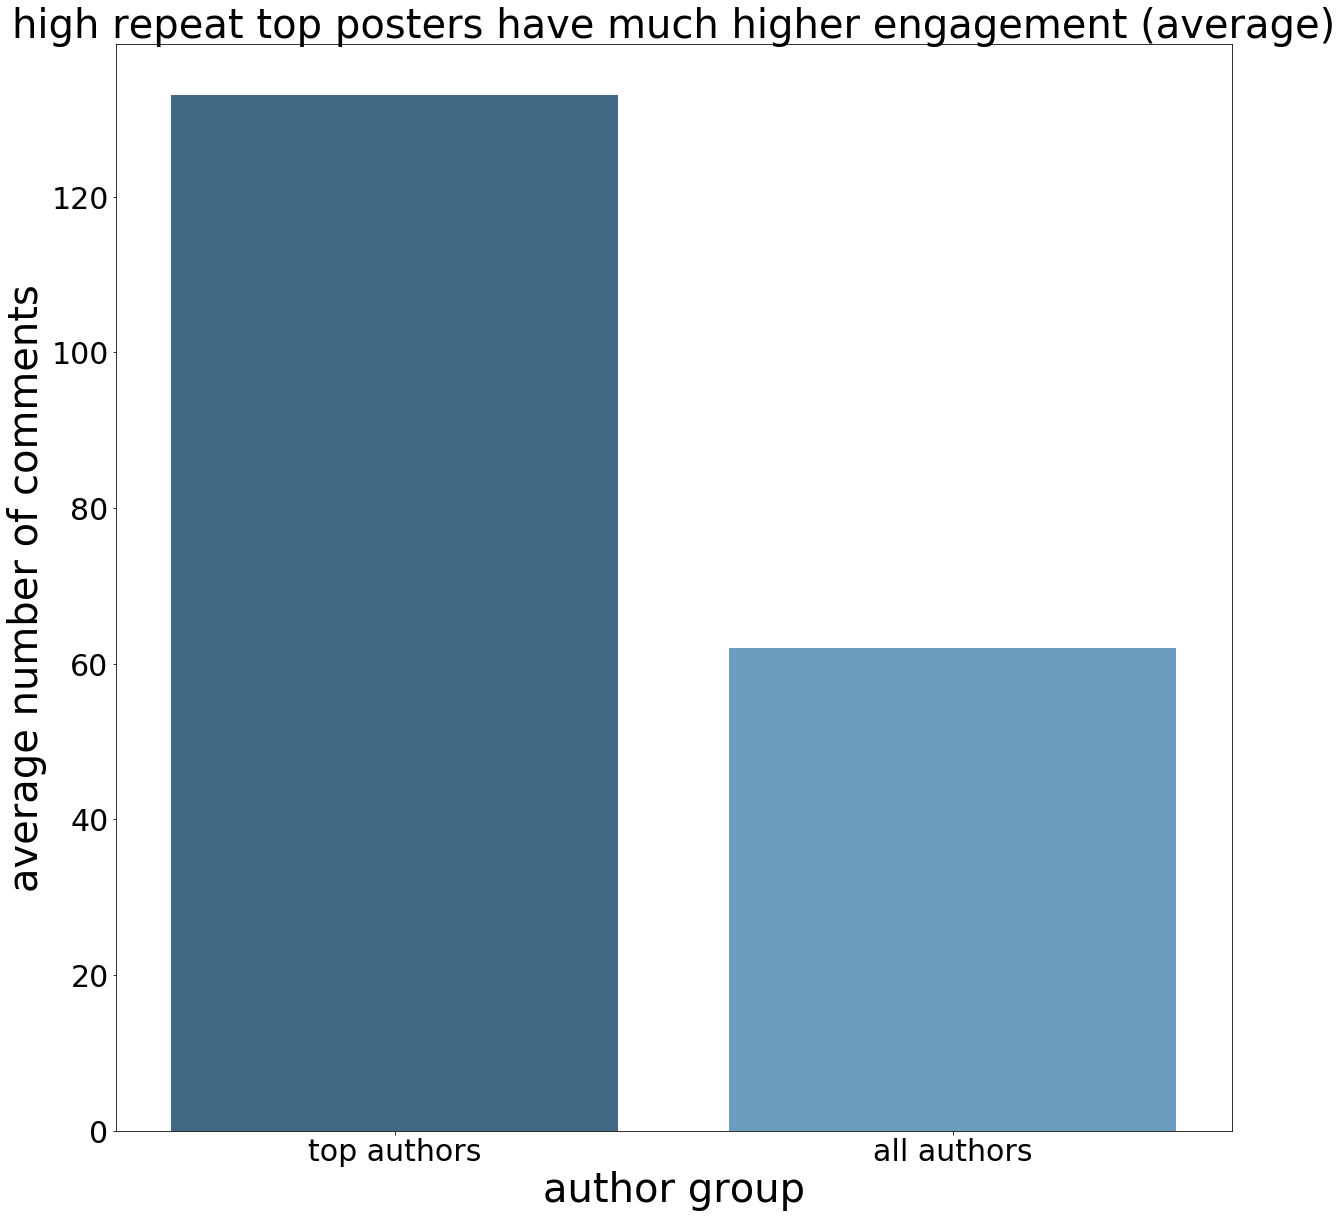

In [12]:
import seaborn as sns
plt.figure(figsize=(20,20))
ax = sns.barplot(y=[133, 62] , x = ['top authors','all authors'], palette="Blues_d")
ax.grid(False)
ax.set_xlabel('author group', fontsize = 40)
ax.set_ylabel('average number of comments', fontsize = 40)
ax.set_title('high repeat top posters have much higher engagement (average)', fontsize = 40)
ax.tick_params(labelsize=30)
plt.rcParams['savefig.dpi'] = 500
plt.savefig('topauthmean.png')
plt.show()

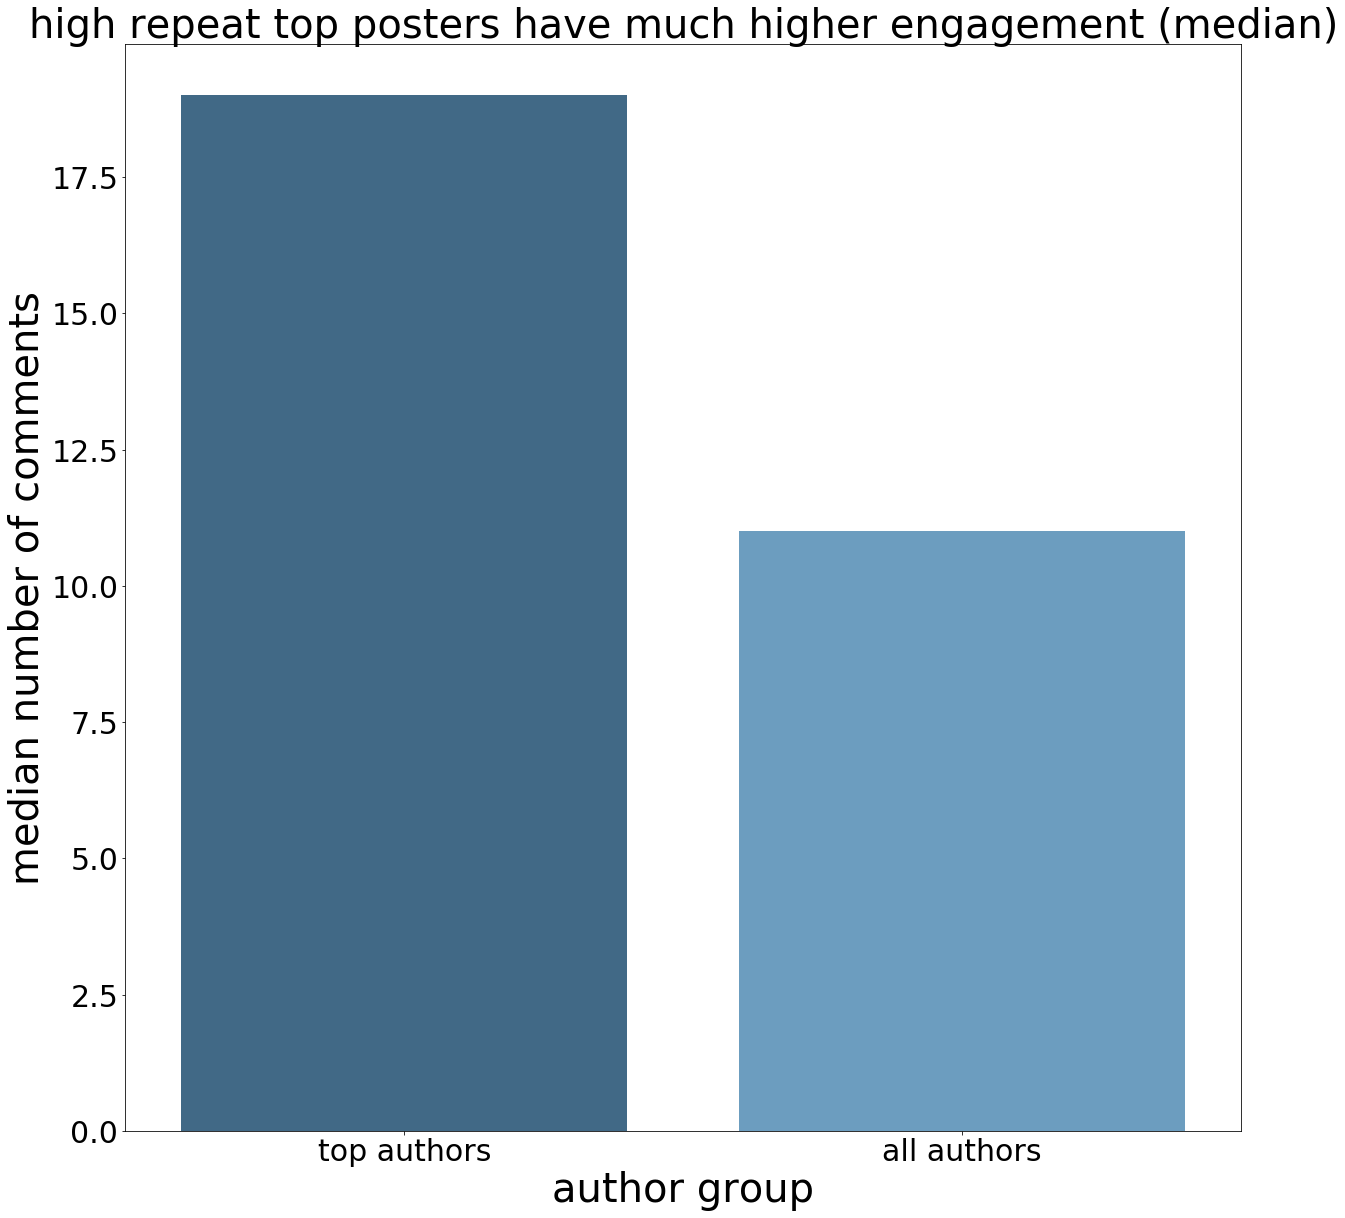

In [13]:
import seaborn as sns
plt.figure(figsize=(20,20))
ax = sns.barplot(y=[19, 11] , x = ['top authors','all authors'], palette="Blues_d")
ax.grid(False)
ax.set_xlabel('author group', fontsize = 40)
ax.set_ylabel('median number of comments', fontsize = 40)
ax.set_title('high repeat top posters have much higher engagement (median)', fontsize = 40)
ax.tick_params(labelsize=30)
plt.rcParams['savefig.dpi'] = 500
plt.savefig('topauthmedian.png')
plt.show()

# Again, a lot more EDA was done that this EDA function, but I have this in here to show what the dataset looks like that I was working with

In [14]:
def eda(dataframe):
  # this code is from @ritikabhasker, slightly adapted, but mainly hers.
    print("**MISSING VALUES** \n", dataframe.isnull().sum(), "\n")
    print("**DATAFRAME INDEX** \n", dataframe.index, "\n")
    print("**DATAFRAME TYPES** \n", dataframe.dtypes, "\n")
    print("**DATAFRAME SHAPE** \n", dataframe.shape, "\n")
    print("**DATAFRAME DESCRIBE** \n", dataframe.describe(), "\n")
    print("**NUMBER OF UNIQUE VALUES PER COLUMN**")
    for item in dataframe:
        print(item)
        print(dataframe[item].nunique(), "\n")

In [15]:
eda(totalhot)

**MISSING VALUES** 
 postid           0
author           0
subr             0
comments         0
authorhex        0
domain           0
timestamp        0
score            0
time_scraped     0
title            0
hours_ago        0
rank             0
postkarma        0
commentkarma     0
became_user      0
age              0
trophy           0
subscribers      0
post_type        0
time_created     0
time_existed     0
title_length     0
above_median     0
above_average    0
dtype: int64 

**DATAFRAME INDEX** 
 Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            11255, 11256, 11257, 11258, 11259, 11261, 11262, 11263, 11264,
            11265],
           dtype='int64', length=10542) 

**DATAFRAME TYPES** 
 postid                    object
author                    object
subr                      object
comments                   int64
authorhex                 object
domain                    object
timestamp          

In [16]:
totalhot.head()

,postid,author,subr,comments,authorhex,domain,timestamp,score,time_scraped,title,hours_ago,rank,postkarma,commentkarma,became_user,age,trophy,subscribers,post_type,time_created,time_existed,title_length,above_median,above_average
0,t3_78rcgl,DavidLuizshair,aww,304,t2_h1jsr,i.imgur.com,1508971064,16506,2017-10-26 03:13:27,This might be the start of something wonderful,4,1,104625.0,6648.0,2014-06-19,3.0,Three-Year Club,16174443.0,image,2017-10-25 22:37:44,04:35:43,8,1,1
1,t3_78rsyc,Autisticpepe,news,1114,t2_3lltu9z,movieweb.com,1508975675,18566,2017-10-26 03:13:27,Corey Feldman launches campaign to expose Holl...,3,2,62326.0,2473.0,2017-06-09,4.0,reddit gold,15245091.0,other,2017-10-25 23:54:35,03:18:52,9,1,1
2,t3_78r59b,drummerboy91,pics,1310,t2_hb9kv,imgur.com,1508969119,73242,2017-10-26 03:13:27,Buried my dad today. He worked for Mississippi...,5,3,7584.0,2658.0,2014-07-08,3.0,Three-Year Club,17762484.0,image,2017-10-25 22:05:19,05:08:08,21,1,1
3,t3_78s23k,MightyMinnesota,baseball,230,t2_r0bat,streamable.com,1508978241,2558,2017-10-26 03:13:27,Vin Scully throws out the first pitch for Game...,2,4,40277.0,50970.0,2015-10-07,2.0,Two-Year Club,605961.0,video,2017-10-26 00:37:21,02:36:06,10,1,1
4,t3_78pt8g,urredditm8,JusticeServed,3032,t2_161zao,joemygod.com,1508957402,38838,2017-10-26 03:13:27,"Kentucky loses appeal, ordered to pay $222k in...",8,5,13573.0,4086.0,2017-03-09,7.0,Verified Email,233308.0,other,2017-10-25 18:50:02,08:23:25,19,1,1


In [17]:
df_post_type = pd.get_dummies(totalhot['post_type'], prefix='post_type_')
# Join the dummy variables to the main dataframe
totalhot = pd.concat([totalhot, df_post_type], axis=1)
totalhot_list_before_dummy = list(totalhot.drop('above_median', axis = 1).columns)
df_subr = pd.get_dummies(totalhot['subr'], prefix='subr')
# Join the dummy variables to the main dataframe
totalhot = pd.concat([totalhot, df_subr], axis=1)
list_of_subr = list(df_subr.columns)

In [18]:
X= totalhot.drop(['above_median','above_average','postid',
                  'author','subr','authorhex','domain','timestamp','time_scraped',
                 'rank','became_user','trophy','post_type','time_created',
                  'time_existed','hours_ago'], axis = 1)
y= totalhot['above_median']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=30)

y_altscore= totalhot['score']
y_altcomments = totalhot['comments']
X_train, X_test, y_train_altscore, y_test_altscore = train_test_split(X, y_altscore, test_size=0.3, random_state=30)
X_train, X_test, y_train_altcomments, y_test_altcomments = train_test_split(X, y_altcomments, test_size=0.3, random_state=30)

In [20]:
X_train_subr = X_train[list_of_subr]

In [21]:
X_train_sub_plus = X_train.drop([
 'comments',
 'score',
 'title'
   ], axis = 1)

In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#sc = StandardScaler()
#sc.fit(X_train_subr)
#X_train_subr = sc.transform(X_train_subr)
#min_max_scaler = MinMaxScaler()
#X_train_subr = min_max_scaler.fit_transform(X_train_subr)
forestsubr = RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=30)

scores = cross_val_score(forestsubr, X_train_subr, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

Cross-validated scores: [ 0.52638701  0.53794038  0.54742547  0.54471545  0.5298103   0.54878049
  0.5596206   0.55691057  0.54409769  0.5495251 ]
Average:  0.544521305662


In [23]:
forestsubrplus = RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=30)

scores = cross_val_score(forestsubrplus, X_train_sub_plus, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

Cross-validated scores: [ 0.57104195  0.60298103  0.60433604  0.57317073  0.60433604  0.59349593
  0.61246612  0.58943089  0.60786974  0.61329715]
Average:  0.597242564356


In [24]:
treeclass = DecisionTreeClassifier(class_weight='balanced', random_state=30)

scores = cross_val_score(treeclass, X_train_sub_plus, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

Cross-validated scores: [ 0.59133965  0.58536585  0.60840108  0.58943089  0.60840108  0.60840108
  0.61246612  0.60433604  0.60515604  0.5834464 ]
Average:  0.599674425853


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tvec10 = TfidfVectorizer(max_features = 10,stop_words='english')
tvec10.fit(X_train.title)
X_train = X_train.reset_index()
vec10  = pd.DataFrame(tvec10.fit_transform(X_train['title']).todense(),columns=tvec10.get_feature_names())

In [26]:
X_train = X_train.drop('index', axis = 1)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec100 = TfidfVectorizer(max_features = 100,stop_words='english')
tvec100.fit(X_train.title)
#X_train = X_train.reset_index()
vec100  = pd.DataFrame(tvec100.fit_transform(X_train['title']).todense(),columns=tvec100.get_feature_names())

tvec5 = TfidfVectorizer(max_features = 5,stop_words='english')
tvec5.fit(X_train.title)
vec5  = pd.DataFrame(tvec5.fit_transform(X_train['title']).todense(),columns=tvec5.get_feature_names())

tvec20 = TfidfVectorizer(max_features = 5,stop_words='english')
tvec20.fit(X_train.title)
vec20  = pd.DataFrame(tvec20.fit_transform(X_train['title']).todense(),columns=tvec20.get_feature_names())



In [29]:
#tvectest10 = TfidfVectorizer(max_features = 10,stop_words='english')
#tvectest10.fit(X_test.title)
X_test = X_test.reset_index()
vectest10  = pd.DataFrame(tvec10.fit_transform(X_test['title']).todense(),columns=tvec10.get_feature_names())

In [30]:
X_test = X_test.drop('index', axis = 1)

tvec5 = TfidfVectorizer(max_features = 5,stop_words='english')
tvec5.fit(X_train.title)
vec5  = pd.DataFrame(tvec5.fit_transform(X_train['title']).todense(),columns=tvec5.get_feature_names())

tvec20 = TfidfVectorizer(max_features = 5,stop_words='english')
tvec20.fit(X_train.title)
vec20  = pd.DataFrame(tvec20.fit_transform(X_train['title']).todense(),columns=tvec20.get_feature_names())

tvectest10 = TfidfVectorizer(max_features = 10,stop_words='english')
tvectest10.fit(X_test.title)
X_test = X_test.reset_index()
vectest10  = pd.DataFrame(tvectest10.fit_transform(X_test['title']).todense(),columns=tvectest10.get_feature_names())

In [31]:
forestvec10 = RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=30)

scores = cross_val_score(forestvec10, vec10, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

forestvec10.fit(vec10, y_train)

print(forestvec10.score(vectest10, y_test))

Cross-validated scores: [ 0.52638701  0.54742547  0.50948509  0.52439024  0.50542005  0.51355014
  0.53658537  0.51897019  0.51696065  0.52238806]
Average:  0.522156227873
0.51185583307


dzz3 = DecisionTreeClassifier(class_weight='balanced', max_depth = 3)
#s = cross_val_score(dzz, X_train_lots, y_train, n_jobs=-1)
#print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest with Balanced Classes", s.mean().round(3), s.std().round(3)))

scores = cross_val_score(dzz3, X_train_lots, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

dzz= dzz3.fit(X_train_lots, y_train)

print('Residual Sum of Squares:',  dzz3.score(X_train_lots, y_train))

In [33]:
forestvec5 = RandomForestClassifier(class_weight='balanced', max_depth=5, random_state = 30)

scores = cross_val_score(forestvec5, vec5, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

Cross-validated scores: [ 0.53044655  0.53523035  0.50135501  0.49593496  0.50406504  0.51219512
  0.52710027  0.49593496  0.51967436  0.49525102]
Average:  0.511718764068


In [34]:
forestvec20 = RandomForestClassifier(class_weight='balanced', max_depth=5, random_state = 30)

scores = cross_val_score(forestvec20, vec20, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

Cross-validated scores: [ 0.53044655  0.53523035  0.50135501  0.49593496  0.50406504  0.51219512
  0.52710027  0.49593496  0.51967436  0.49525102]
Average:  0.511718764068


In [35]:
forestvec100 = RandomForestClassifier(class_weight='balanced', max_depth=5, random_state = 30)

scores = cross_val_score(forestvec100, vec100, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

Cross-validated scores: [ 0.51826793  0.53116531  0.52710027  0.52710027  0.50542005  0.5298103
  0.51219512  0.51897019  0.52781547  0.53052917]
Average:  0.522837408768


In [36]:
cvec10 = CountVectorizer(max_features = 10,stop_words='english')
cvec10.fit(X_train.title)
vecc10  = pd.DataFrame(cvec10.fit_transform(X_train['title']).todense(),columns=cvec10.get_feature_names())

cvec100 = CountVectorizer(max_features = 100,stop_words='english')
cvec100.fit(X_train.title)
vecc100  = pd.DataFrame(cvec100.fit_transform(X_train['title']).todense(),columns=cvec100.get_feature_names())

cvec5 = CountVectorizer(max_features = 5,stop_words='english')
cvec5.fit(X_train.title)
vecc5  = pd.DataFrame(cvec5.fit_transform(X_train['title']).todense(),columns=cvec5.get_feature_names())

cvec20 = CountVectorizer(max_features = 5,stop_words='english')
cvec20.fit(X_train.title)
vecc20  = pd.DataFrame(cvec20.fit_transform(X_train['title']).todense(),columns=cvec20.get_feature_names())

In [37]:
forescvec10 = RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=30)

scores = cross_val_score(forescvec10, vecc10, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average 10: ", scores.mean())

forescvec100 = RandomForestClassifier(class_weight='balanced', max_depth=5, random_state = 30)

scores = cross_val_score(forescvec100, vecc100, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average 100: ", scores.mean())

forescvec20 = RandomForestClassifier(class_weight='balanced', max_depth=5, random_state = 30)

scores = cross_val_score(forescvec20, vecc20, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average 20: ", scores.mean())

forescvec5 = RandomForestClassifier(class_weight='balanced', max_depth=5, random_state = 30)

scores = cross_val_score(forescvec5, vecc5, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average 5: ", scores.mean())

Cross-validated scores: [ 0.51691475  0.54607046  0.51084011  0.52710027  0.51626016  0.51355014
  0.53252033  0.5203252   0.5156038   0.52645862]
Average 10:  0.522564383153
Cross-validated scores: [ 0.53179973  0.54065041  0.54471545  0.53794038  0.51626016  0.52845528
  0.52168022  0.53252033  0.52917232  0.54409769]
Average 100:  0.532729196515
Cross-validated scores: [ 0.53044655  0.5203252   0.5         0.49593496  0.50542005  0.50813008
  0.52574526  0.49728997  0.51967436  0.50203528]
Average 20:  0.51050017115
Cross-validated scores: [ 0.53044655  0.5203252   0.5         0.49593496  0.50542005  0.50813008
  0.52574526  0.49728997  0.51967436  0.50203528]
Average 5:  0.51050017115


In [38]:
cvectest10 = CountVectorizer(max_features = 10,stop_words='english')
cvectest10.fit(X_test.title)
cvectest10  = pd.DataFrame(cvectest10.fit_transform(X_test['title']).todense(),columns=cvectest10.get_feature_names())

In [39]:
forescvec10.fit(vecc10, y_train)

print(forescvec10.score(cvectest10, y_test))

0.511539677521


In [40]:
X_train = X_train.join(vec10)

In [41]:
X_test = X_test.join(vectest10)

from sklearn.feature_extraction.text import TfidfVectorizer
tvec10 = TfidfVectorizer(max_features = 10,stop_words='english')
tvec10.fit(X_train.title)
#X_train = X_train.reset_index()
vec10  = pd.DataFrame(tvec10.fit_transform(X_train['title']).todense(),columns=tvec10.get_feature_names())
#X_train = X_train.join(df)
#X_train.columns

forestvec10 = RandomForestClassifier(class_weight='balanced', max_depth=5)
scores = cross_val_score(tvec10, vec10, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())
#X_train = X_train.join(df)
#X_train.columns

In [42]:
X_train_lots = X_train.drop(['comments',
 'score',
 'title' ], axis = 1)
forestlots = RandomForestClassifier(class_weight='balanced', max_depth=5, random_state = 30)

scores = cross_val_score(forestlots, X_train_lots, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

forestlots= forestlots.fit(X_train_lots, y_train)

print('Residual Sum of Squares:',  forestlots.score(X_train_lots, y_train))

Cross-validated scores: [ 0.57239513  0.600271    0.57723577  0.59756098  0.59485095  0.61924119
  0.60162602  0.56097561  0.56037992  0.62550882]
Average:  0.591004538429
Residual Sum of Squares: 0.598455075213


In [43]:
new_subr_list = list_of_subr + ['title','score', 'comments']

In [44]:
X_train_simpler= X_train.drop(new_subr_list, axis = 1)
X_test_simpler = X_test.drop(new_subr_list, axis = 1)

In [45]:
X_train_simpler.columns

Index(['postkarma', 'commentkarma', 'age', 'subscribers', 'title_length',
       'post_type__image', 'post_type__other', 'post_type__reddit_textlink',
       'post_type__video', 'game', 'got', 'halloween', 'just', 'like', 'make',
       'new', 'people', 'post', 'time'],
      dtype='object')

In [46]:
colscolscols = ['post karma', 'comment karma', 'years active', 'subscribers', 'title length',
       'image', 'other', 'reddit',
       'video', 'game', 'got', 'halloween', 'just', 'like', 'make',
       'new', 'people', 'post', 'time']

In [51]:
X_train_simpler.columns = [colscolscols]
X_test_simpler = X_test_simpler.drop('level_0', axis = 1)
X_test_simpler.columns = [colscolscols]

# Below is the main model I end up using

In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

forest = RandomForestClassifier(random_state = 30)
#splits = ['best','random']
depth = [1,2,3,4,5]
maxfeat = ['auto','log2']
weight = [None, 'balanced']
boot = [True, False]
est = [5,10,15,20,25]
param_grid = dict(#splitter=splits, 
    n_estimators = est,          
    max_depth = depth, 
              max_features = maxfeat,
                 class_weight = weight,
                 bootstrap = boot)
grid = GridSearchCV(forest, param_grid, cv=3, verbose = 1)

grid.fit(X_train_simpler, y_train)

best_results = {'params': list(grid.best_params_.items()), 'score': grid.best_score_}

best_forest = grid.best_estimator_

best_forest = best_forest.fit(X_train_simpler, y_train)

score = best_forest.score(X_test_simpler, y_test)

#print('Number of Models Run: ', len(penalties) * len(range_C) * len(class_weights) * 3)
print("{} Score: {:0.3}".format('Forest', score.mean().round(3)), '\n')
#print('Elapsed Time: {:0.3}'.format( time.time() - start_time), ' seconds', '\n')
print(grid.best_estimator_, '\n')
print('Best Hyperparameters we tested for', '\n', best_results)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Forest Score: 0.642 

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=30, verbose=0, warm_start=False) 

Best Hyperparameters we tested for 
 {'params': [('bootstrap', False), ('class_weight', None), ('max_depth', 5), ('max_features', 'auto'), ('n_estimators', 15)], 'score': 0.63138636671635728}


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   28.9s finished


In [54]:
best_forest.predict(X_test_simpler)

array([1, 1, 0, ..., 0, 1, 1])

In [55]:
feature_importances = pd.DataFrame(best_forest.feature_importances_,
                                   index = X_train_simpler.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances

,importance
subscribers,0.412250
post karma,0.233047
image,0.093020
comment karma,0.084783
title length,0.076751
other,0.032300
reddit,0.021124
years active,0.016216
people,0.006309
video,0.005119


In [56]:
feature_importances['importance'] = feature_importances['importance'] * 100

In [57]:
ns = feature_importances.iloc[:10].importance

In [58]:
nsz = feature_importances.iloc[:10].index

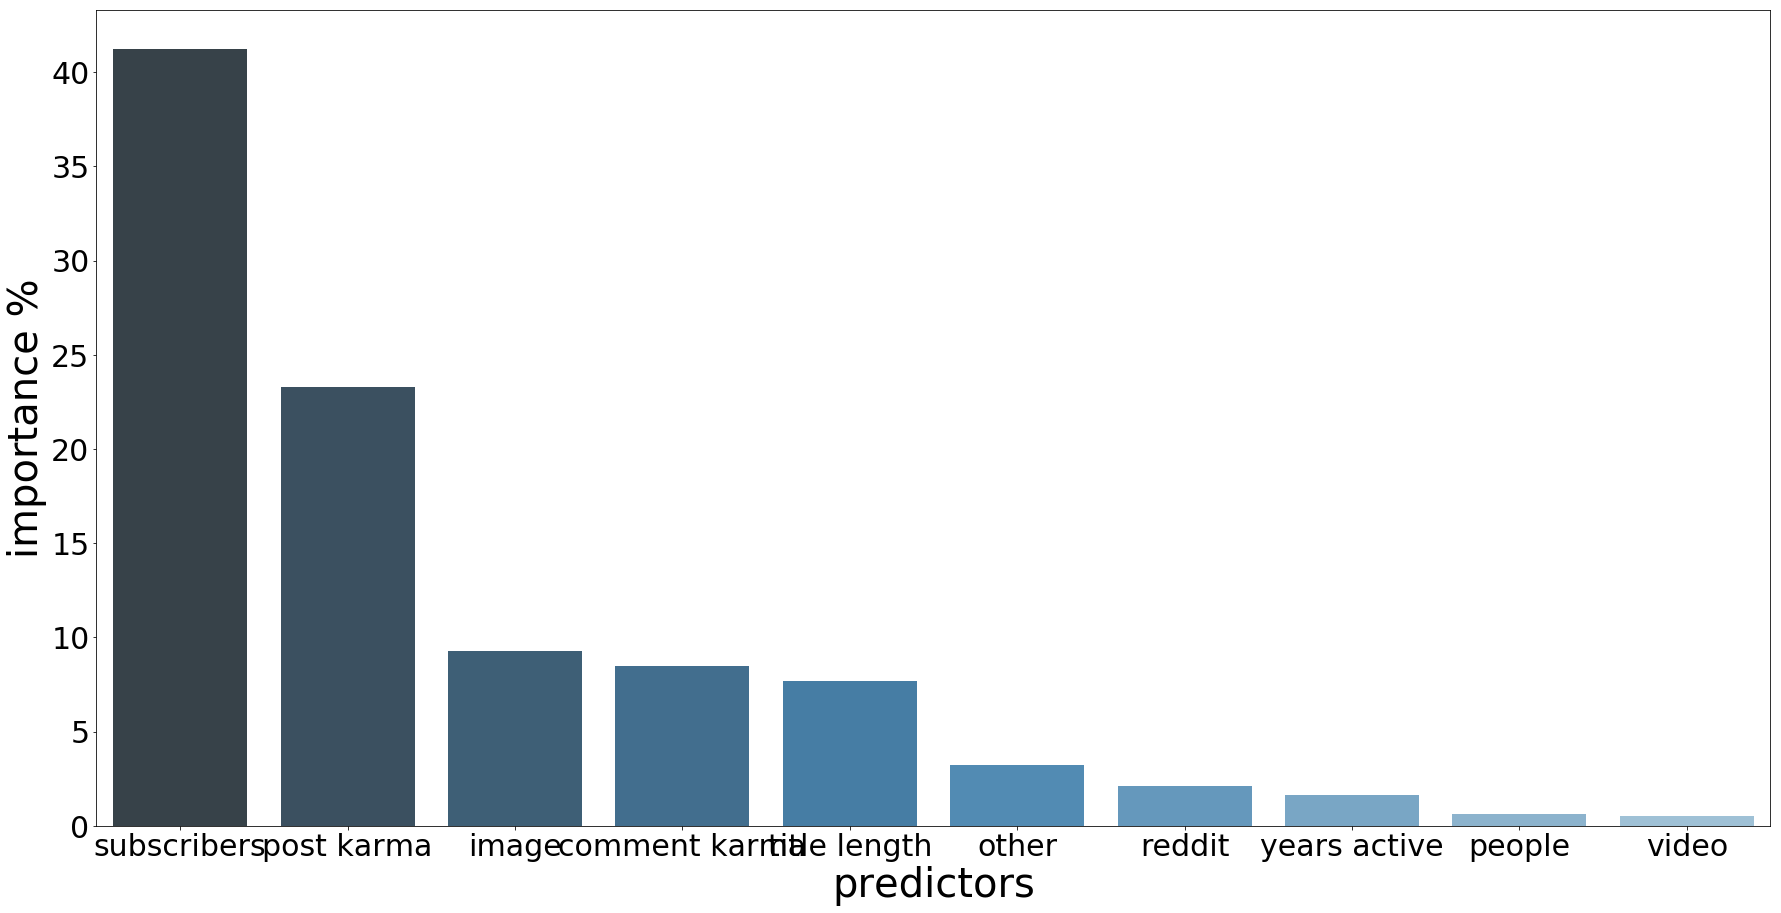

In [59]:
import seaborn as sns
plt.figure(figsize=(30,15)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.barplot(y= ns, x = nsz, palette="Blues_d")
ax.grid(False)
ax.set_xlabel('predictors', fontsize = 40)
ax.set_ylabel('importance %', fontsize = 40)
ax.tick_params(labelsize=30)
plt.rcParams['savefig.dpi'] = 500
plt.savefig('feat_importance.png')
plt.show()

# Sensitivity score of .71 is pretty good considering

Accuracy:  0.642111919064
Precision:  0.614261650758
Roc-Auc:  0.697964379339


Confusion matrix, without normalization
                  Bad Quality Good Quality 
     Bad Quality        937.0        687.0 
    Good Quality        445.0       1094.0 


Normalized confusion matrix
                  Bad Quality Good Quality 
     Bad Quality          0.6          0.4 
    Good Quality          0.3          0.7 


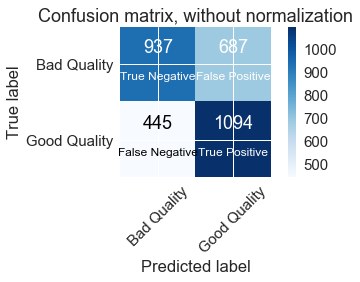

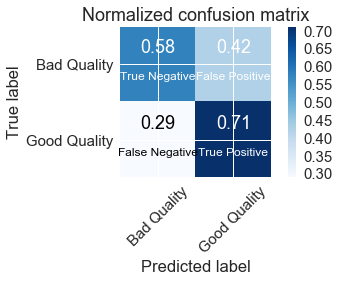

Sensitivity (TP/ TP + FN):  0.710851202079
Specificity (TN/ TN + FP):  0.57697044335
Precision   (TP/ TP + FP):  0.614261650758


In [61]:
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score

#CHANGE BELOW*****
model = best_forest
y_pred = best_forest.predict(X_test_simpler)
x_test = X_test_simpler
y_test = y_test
class_names = ['Bad Quality', 'Good Quality']
#CHANGE ABOVE*****

#Set font and graph size
sns.set(font_scale=1.5)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=3)

def print_cm(cm, labels=class_names, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=' ')
    for label in labels: 
        print("%{0}s".format(columnwidth) % label, end=' ')
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=' ')
        for j in range(len(labels)): 
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=' ')
        print()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('\n')
        print("Normalized confusion matrix")
    else:
        print('\n')
        print('Confusion matrix, without normalization')
    
    print_cm(cm, class_names)
    
    text_labels = [['True Negative', 'False Positive'], 
                   ['False Negative', 'True Positive']]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(list(range(cm.shape[0])), list(range(cm.shape[1]))):
        plt.text(j , i - 0.1, format(cm[i, j], fmt),
                 verticalalignment='bottom',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.text(j, i + 0.1, text_labels[i][j], 
                 verticalalignment='top',
                 horizontalalignment="center",
                 fontsize=12,
                 color="white" if cm[i, j] > thresh else "black")
       
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Print accuracy and precision
print('Accuracy: ', accuracy_score(y_test, y_pred, normalize=True))
print('Precision: ', precision_score(y_test, y_pred))
print('Roc-Auc: ', roc_auc_score(y_test, [x[1] for x in model.predict_proba(x_test)]))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')



plt.show()


sensitivity = cnf_matrix[1, 1]/ (cnf_matrix[1, 0] + cnf_matrix[1, 1])
specificity = cnf_matrix[0, 0]/ (cnf_matrix[0, 1] + cnf_matrix[0, 0])
precision = cnf_matrix[1, 1]/ (cnf_matrix[1, 1] + cnf_matrix[0, 1])
print('Sensitivity (TP/ TP + FN): ', sensitivity)
print('Specificity (TN/ TN + FP): ', specificity)
print('Precision   (TP/ TP + FP): ', precision)

In [62]:
y_altscore= totalhot['score']
y_altcomments = totalhot['comments']
X_trainalt, X_testalt, y_train_altscore, y_test_altscore = train_test_split(X, y_altscore, test_size=0.3, random_state=30)
X_trainalt, X_testalt, y_train_altcomments, y_test_altcomments = train_test_split(X, y_altcomments, test_size=0.3, random_state=30)
new_subr_list = list_of_subr + ['title','score', 'comments']
X_trainalt_simpler= X_trainalt.drop(new_subr_list, axis = 1)
X_testalt_simpler = X_testalt.drop(new_subr_list, axis = 1)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

forestregressor = RandomForestRegressor()
#splits = ['best','random']
depth = [1,2,3,4,5]
maxfeat = ['auto','log2']
weight = 'balanced'
boot = [True, False]
est = [5,10,15,20,25]
param_grid = dict(#splitter=splits, 
    n_estimators = est,          
    max_depth = depth, 
              max_features = maxfeat,
                 bootstrap = boot)
grid = GridSearchCV(forestregressor, param_grid, cv=3, verbose = 1)

grid.fit(X_trainalt_simpler, y_train_altscore)

best_results = {'params': list(grid.best_params_.items()), 'score': grid.best_score_}

best_forest = grid.best_estimator_

best_forest = best_forest.fit(X_trainalt_simpler, y_train_altscore)

score = best_forest.score(X_testalt_simpler, y_test_altscore)

#print('Number of Models Run: ', len(penalties) * len(range_C) * len(class_weights) * 3)
print("{} Score: {:0.3}".format('Forest', score.mean().round(3)), '\n')
#print('Elapsed Time: {:0.3}'.format( time.time() - start_time), ' seconds', '\n')
print(grid.best_estimator_, '\n')
print('Best Hyperparameters we tested for', '\n', best_results)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Forest Score: 0.08 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Best Hyperparameters we tested for 
 {'params': [('bootstrap', True), ('max_depth', 3), ('max_features', 'auto'), ('n_estimators', 10)], 'score': 0.11039622327798225}


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   20.7s finished


In [65]:
new_subr_list = list_of_subr + ['title','score', 'comments']
X_trainalt_simpler= X_trainalt.drop(new_subr_list, axis = 1)
X_testalt_simpler = X_testalt.drop(new_subr_list, axis = 1)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

forestregressor2 = RandomForestRegressor()
#splits = ['best','random']
depth = [1,2,3,4,5]
maxfeat = ['auto','log2']
weight = 'balanced'
boot = [True, False]
est = [5,10,15,20,25]
param_grid = dict(#splitter=splits, 
    n_estimators = est,          
    max_depth = depth, 
              max_features = maxfeat,
                 bootstrap = boot)
grid = GridSearchCV(forestregressor2, param_grid, cv=3, verbose = 1)

grid.fit(X_trainalt_simpler, y_train_altcomments)

best_results = {'params': list(grid.best_params_.items()), 'score': grid.best_score_}

best_forest = grid.best_estimator_

best_forest = best_forest.fit(X_trainalt_simpler, y_train_altcomments)

score = best_forest.score(X_testalt_simpler, y_test_altcomments)

#print('Number of Models Run: ', len(penalties) * len(range_C) * len(class_weights) * 3)
print("{} Score: {:0.3}".format('Forest', score.mean().round(3)), '\n')
#print('Elapsed Time: {:0.3}'.format( time.time() - start_time), ' seconds', '\n')
print(grid.best_estimator_, '\n')
print('Best Hyperparameters we tested for', '\n', best_results)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   19.4s finished


Forest Score: 0.064 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 

Best Hyperparameters we tested for 
 {'params': [('bootstrap', True), ('max_depth', 5), ('max_features', 'log2'), ('n_estimators', 25)], 'score': 0.058366630427874183}


# I did a bunch of decision trees for purposes of EDA and to help with vizualizations for my presentation

In [66]:
dzz = DecisionTreeClassifier(class_weight='balanced', max_depth = 5)
#s = cross_val_score(dzz, X_train_lots, y_train, n_jobs=-1)
#print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest with Balanced Classes", s.mean().round(3), s.std().round(3)))

scores = cross_val_score(dzz, X_train_lots, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

dzz= dzz.fit(X_train_lots, y_train)

print('Residual Sum of Squares:',  dzz.score(X_train_lots, y_train))

Cross-validated scores: [ 0.602  0.644  0.623  0.591  0.663  0.622  0.621  0.618  0.616  0.653]
Average:  0.625158061196
Residual Sum of Squares: 0.636536116005


In [67]:
dzz3 = DecisionTreeClassifier(class_weight='balanced', max_depth = 3)
#s = cross_val_score(dzz, X_train_lots, y_train, n_jobs=-1)
#print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest with Balanced Classes", s.mean().round(3), s.std().round(3)))

scores = cross_val_score(dzz3, X_train_lots, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

dzz3= dzz3.fit(X_train_lots, y_train)

print('Residual Sum of Squares:',  dzz3.score(X_train_lots, y_train))

Cross-validated scores: [ 0.586  0.612  0.595  0.591  0.638  0.603  0.596  0.585  0.598  0.605]
Average:  0.601032195242
Residual Sum of Squares: 0.605773139992


In [68]:
dzz2 = DecisionTreeClassifier(class_weight='balanced', max_depth = 2)
#s = cross_val_score(dzz, X_train_lots, y_train, n_jobs=-1)
#print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest with Balanced Classes", s.mean().round(3), s.std().round(3)))

scores = cross_val_score(dzz2, X_train_lots, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

dzz2= dzz2.fit(X_train_lots, y_train)

print('Residual Sum of Squares:',  dzz2.score(X_train_lots, y_train))

Cross-validated scores: [ 0.585  0.612  0.595  0.591  0.638  0.603  0.596  0.585  0.598  0.601]
Average:  0.600489821614
Residual Sum of Squares: 0.604282423093


dz = DecisionTreeClassifier(class_weight='balanced', max_depth = 5)
s = cross_val_score(dt, df, y_train, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest with Balanced Classes", s.mean().round(3), s.std().round(3)))

#scores = cross_val_score(dt, df, y_train, cv=10)
#print("Cross-validated scores:", scores)
#print("Average: ", scores.mean())

dz= dz.fit(df, y_train)

print('Residual Sum of Squares:',  dz.score(df, y_train))

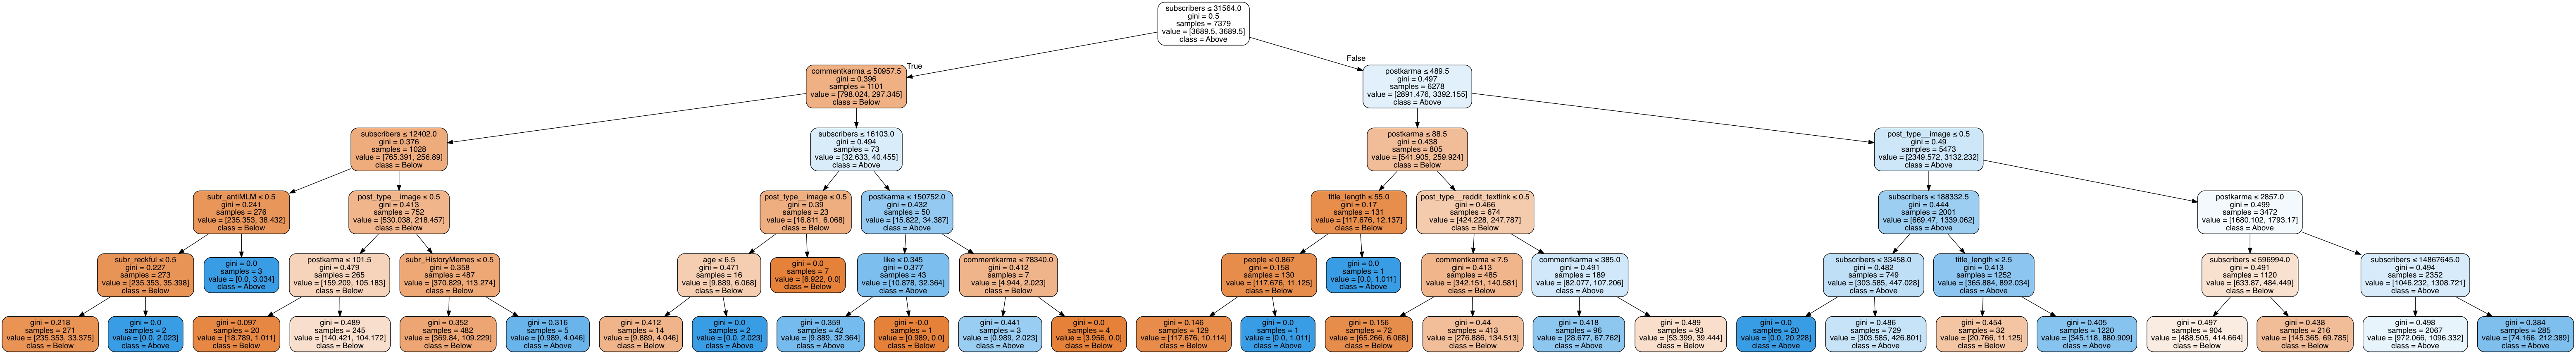

In [69]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dzz, out_file=dot_data,  
                filled=True, rounded=True,
                class_names=['Below','Above'],
                special_characters=True,
                feature_names=X_train_lots.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

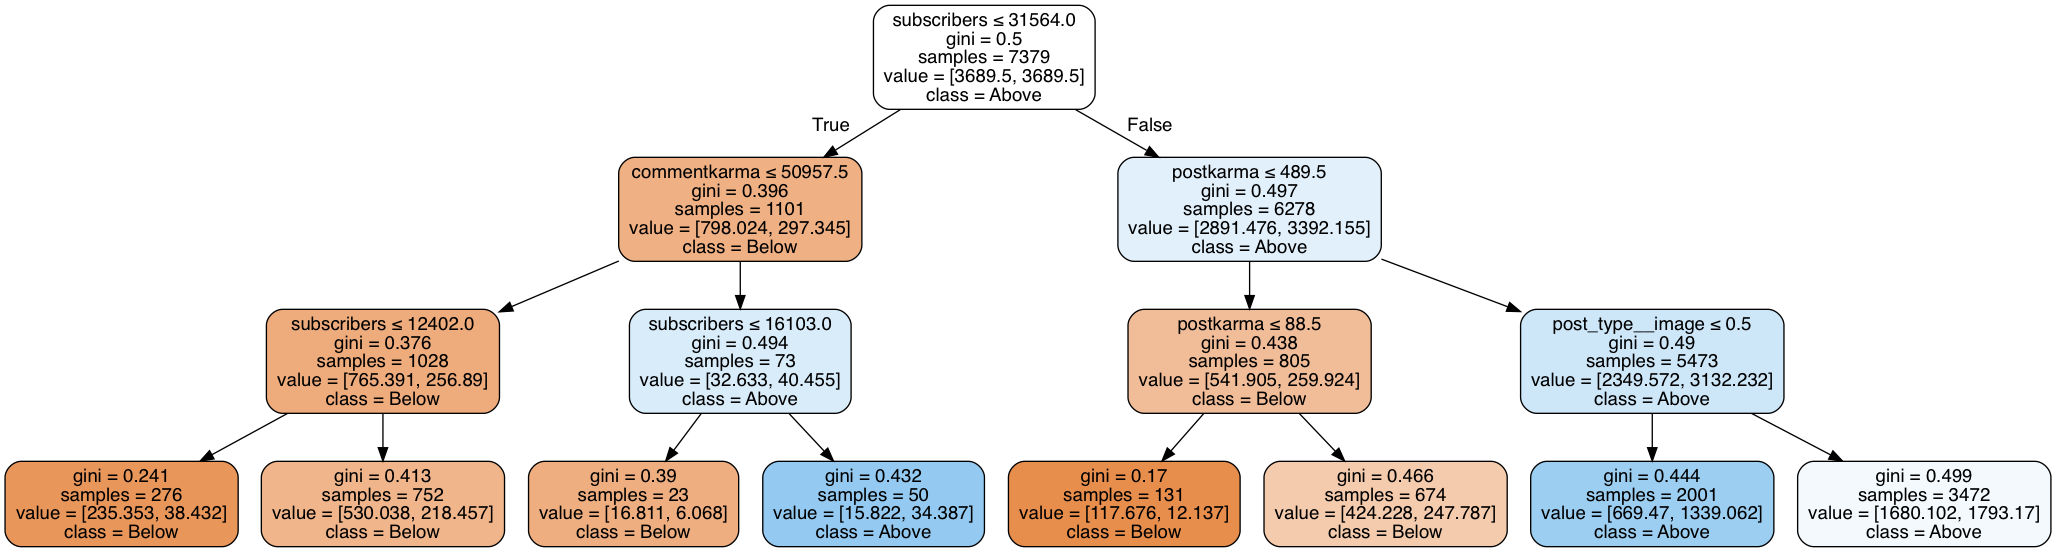

In [70]:
# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dzz3, out_file=dot_data,  
                filled=True, rounded=True,
                class_names=['Below','Above'],
                special_characters=True,
                feature_names=X_train_lots.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

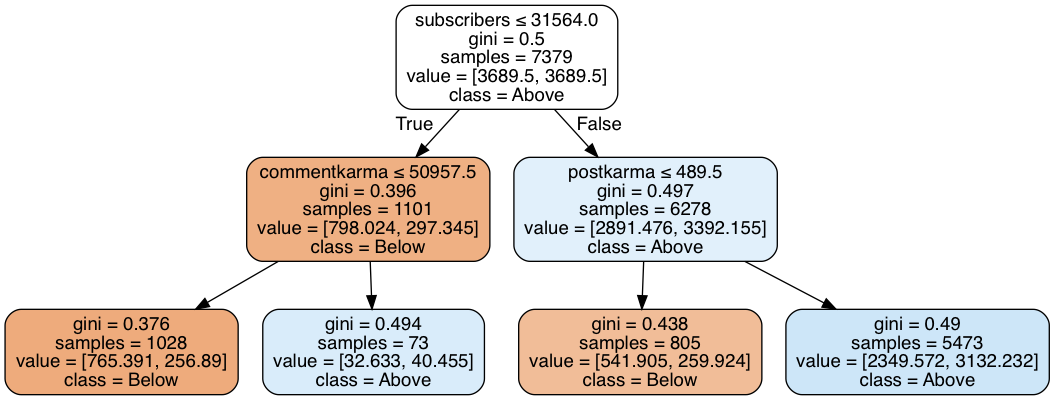

In [71]:
# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dzz2, out_file=dot_data,  
                filled=True, rounded=True,
                class_names=['Below','Above'],
                special_characters=True,
                feature_names=X_train_lots.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

In [72]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
bagging = BaggingClassifier()

scores = cross_val_score(bagging, vec5, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

Cross-validated scores: [ 0.536  0.53   0.499  0.495  0.503  0.515  0.524  0.495  0.521  0.502]
Average:  0.511854635124


In [73]:
dsimple2 = DecisionTreeClassifier(class_weight='balanced', max_depth = 2)
#s = cross_val_score(dzz, X_train_lots, y_train, n_jobs=-1)
#print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest with Balanced Classes", s.mean().round(3), s.std().round(3)))

scores = cross_val_score(dsimple2, X_train_simpler, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

dsimple2= dsimple2.fit(X_train_simpler, y_train)

print('Residual Sum of Squares:',  dsimple2.score(X_train_simpler, y_train))

Cross-validated scores: [ 0.585  0.612  0.595  0.591  0.638  0.603  0.596  0.585  0.598  0.601]
Average:  0.600489821614
Residual Sum of Squares: 0.604282423093


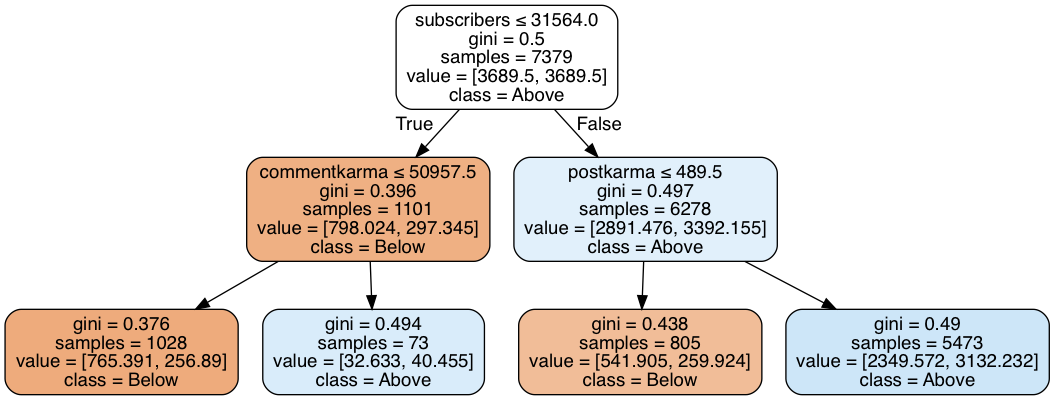

In [74]:
# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dsimple2, out_file=dot_data,  
                filled=True, rounded=True,
                class_names=['Below','Above'],
                special_characters=True,
                feature_names=X_train_simpler.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

In [75]:
dsimple3 = DecisionTreeClassifier(class_weight='balanced', max_depth = 3)
#s = cross_val_score(dzz, X_train_lots, y_train, n_jobs=-1)
#print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest with Balanced Classes", s.mean().round(3), s.std().round(3)))

scores = cross_val_score(dsimple3, X_train_simpler, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

dsimple3= dsimple3.fit(X_train_simpler, y_train)

print('Residual Sum of Squares:',  dsimple3.score(X_train_simpler, y_train))

Cross-validated scores: [ 0.586  0.612  0.595  0.591  0.638  0.603  0.596  0.591  0.598  0.605]
Average:  0.601574200662
Residual Sum of Squares: 0.605773139992


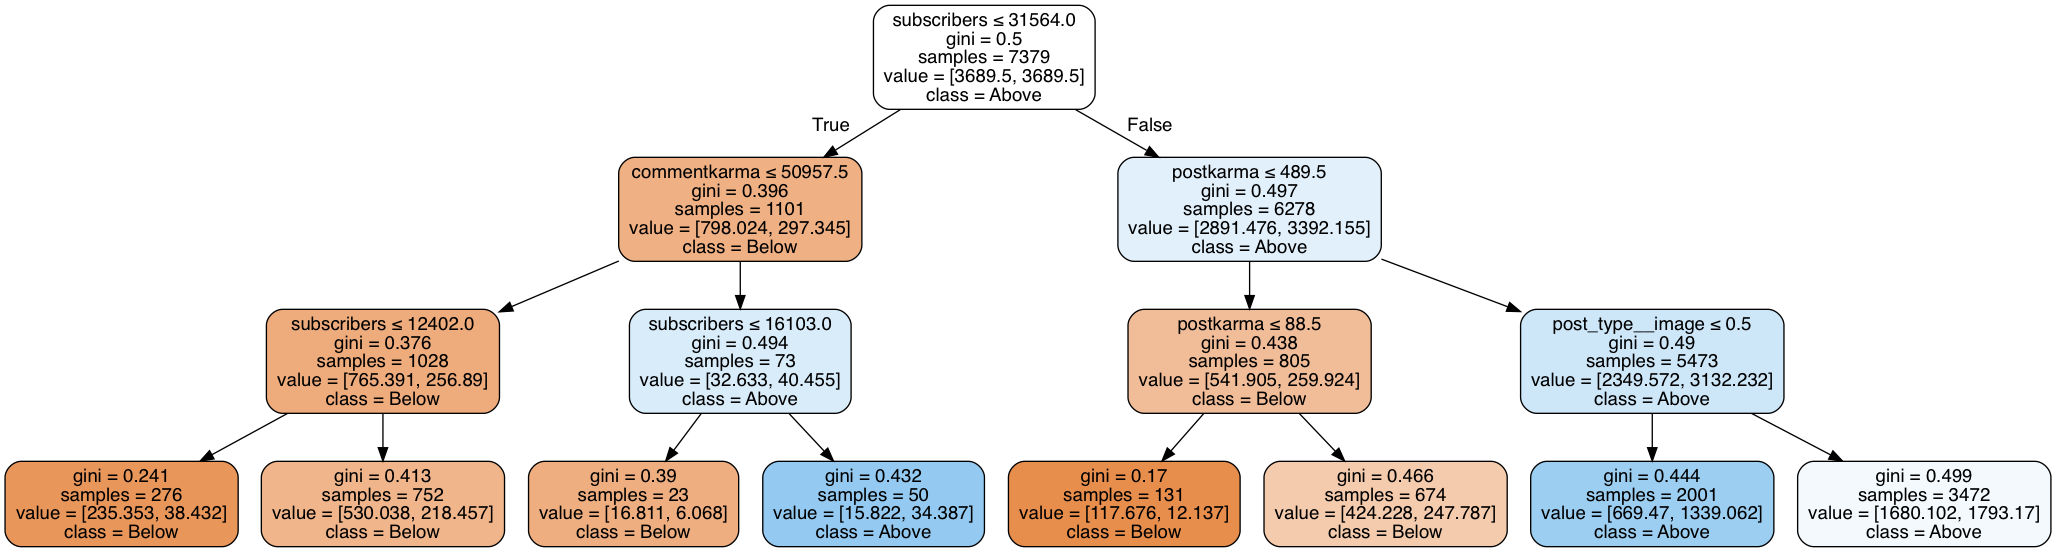

In [76]:
# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dsimple3, out_file=dot_data,  
                filled=True, rounded=True,
                class_names=['Below','Above'],
                special_characters=True,
                feature_names=X_train_simpler.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

In [81]:
X_test_simpler = X_test_simpler.drop('level_0', axis = 1)
simpletrees3 = DecisionTreeClassifier(random_state=30)
splits = ['best','random']
#depth = 3
maxfeat = ['auto','log2']
weight = [None, 'balanced']
minleaf = [10, 15, 20, 30]

param_grid = dict(splitter=splits, 
              max_depth = [3], 
              max_features = maxfeat,
                 class_weight = weight,
                 min_samples_leaf=minleaf)
grid = GridSearchCV(simpletrees3, param_grid, cv=20, verbose = 1)

grid.fit(X_train_simpler, y_train)

best_results = {'params': list(grid.best_params_.items()), 'score': grid.best_score_}

best_trees = grid.best_estimator_

best_trees = best_trees.fit(X_train_simpler, y_train)

score = best_trees.score(X_test_simpler, y_test)

#print('Number of Models Run: ', len(penalties) * len(range_C) * len(class_weights) * 3)
print("{} Score: {:0.3}".format('Trees', score.mean().round(3)), '\n')
#print('Elapsed Time: {:0.3}'.format( time.time() - start_time), ' seconds', '\n')
print(grid.best_estimator_, '\n')
print('Best Hyperparameters we tested for', '\n', best_results)

Fitting 20 folds for each of 32 candidates, totalling 640 fits
Trees Score: 0.575 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=30,
            splitter='random') 

Best Hyperparameters we tested for 
 {'params': [('class_weight', None), ('max_depth', 3), ('max_features', 'auto'), ('min_samples_leaf', 30), ('splitter', 'random')], 'score': 0.57067353299905133}


[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:    4.7s finished


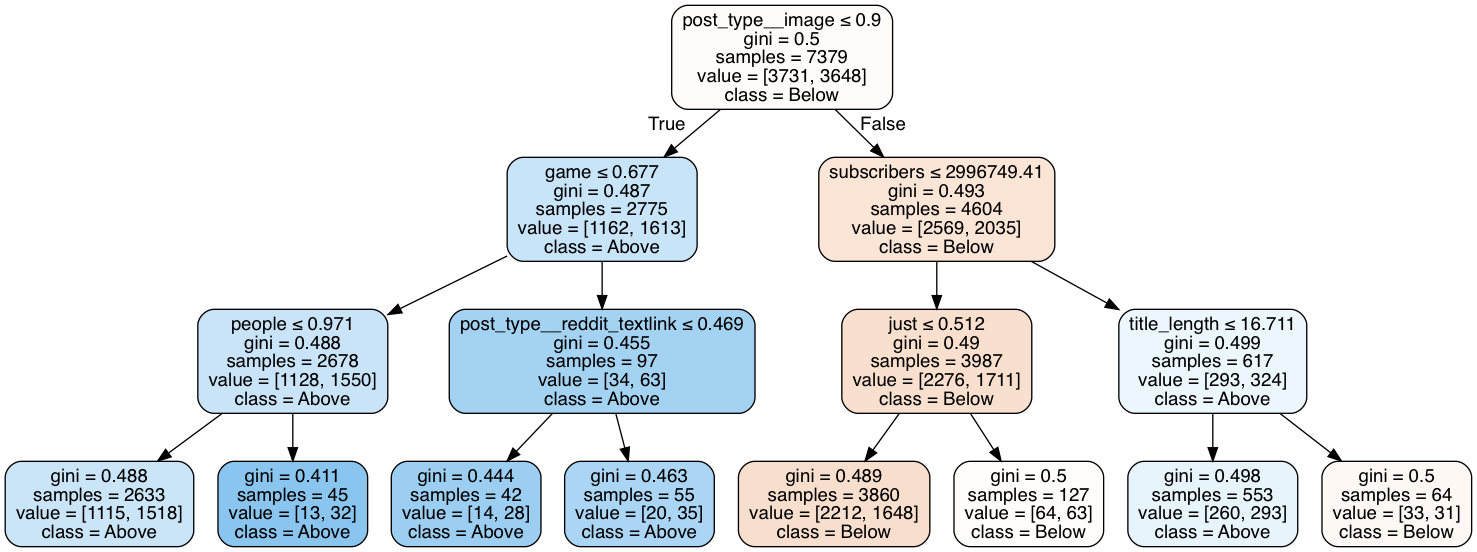

In [82]:
# initialize the output file object
dot_data = StringIO() 

export_graphviz(best_trees, out_file=dot_data,  
                filled=True, rounded=True,
                class_names=['Below','Above'],
                special_characters=True,
                feature_names=X_train_simpler.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

In [83]:
X_train_nosubs = X_train_simpler.drop('subscribers', axis = 1)

In [84]:
X_test_nosubs = X_test_simpler.drop('subscribers', axis = 1)

In [85]:
simpletrees3 = DecisionTreeClassifier(random_state=30)
splits = ['best','random']
#depth = 3
maxfeat = ['auto','log2']
weight = [None, 'balanced']

param_grid = dict(splitter=splits, 
              max_depth = [3], 
              max_features = maxfeat,
                 class_weight = weight)
grid = GridSearchCV(simpletrees3, param_grid, cv=20, verbose = 1)

grid.fit(X_train_nosubs, y_train)

best_results_trees_nosub = {'params': list(grid.best_params_.items()), 'score': grid.best_score_}

best_trees_nosub = grid.best_estimator_

best_trees_nosub = best_trees_nosub.fit(X_train_nosubs, y_train)

score = best_trees_nosub.score(X_test_nosubs, y_test)

#print('Number of Models Run: ', len(penalties) * len(range_C) * len(class_weights) * 3)
print("{} Score: {:0.3}".format('Trees', score.mean().round(3)), '\n')
#print('Elapsed Time: {:0.3}'.format( time.time() - start_time), ' seconds', '\n')
print(grid.best_estimator_, '\n')
print('Best Hyperparameters we tested for', '\n', best_results)

Fitting 20 folds for each of 8 candidates, totalling 160 fits
Trees Score: 0.574 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=30,
            splitter='best') 

Best Hyperparameters we tested for 
 {'params': [('class_weight', None), ('max_depth', 3), ('max_features', 'auto'), ('min_samples_leaf', 30), ('splitter', 'random')], 'score': 0.57067353299905133}


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    1.2s finished


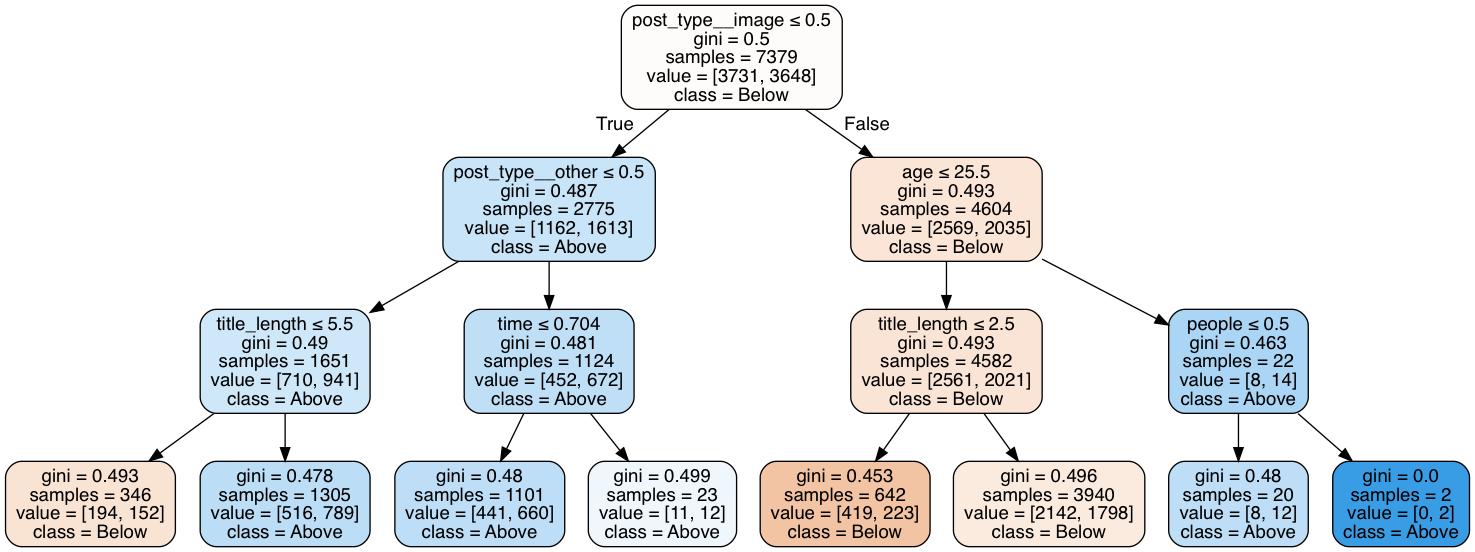

In [86]:
# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(best_trees_nosub, out_file=dot_data,  
                filled=True, rounded=True,
                class_names=['Below','Above'],
                special_characters=True,
                feature_names=X_train_nosubs.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

In [88]:
simple = X_train[['postkarma','commentkarma','age','subscribers',
 'title_length','post_type__image','post_type__other','post_type__video']] #dropped text link type

In [89]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

scores = cross_val_score(logit, simple, y_train, cv=10)
print("Cross-validated scores:", scores)
print("Average: ", scores.mean())

Cross-validated scores: [ 0.494  0.495  0.495  0.493  0.495  0.495  0.495  0.495  0.494  0.494]
Average:  0.494240362824


# The rise of reddit royalty
(I felt as though a pitch was better than an executive summary, given the prompt)

Over the last 3 months, reddit.com has been the 4th most visited site in the U.S. The site is popular for its never-ending stream of fresh memes, but also for its community feel. Its old-school aesthetic harkens back to an internet that is slowly dissapearing: community-regulated, no censorship, and non-hierachical. These attributes used to be associated with the internet at large, but as titans such as Google and Facebook control more of the internet, and as governments and advertisers becomes more interested in regulating the types of content that appears, reddit appears to fight against the current. But even in reddit, there does appear to be a favored class that have undue influence on the site. 

I propose an article profiling this group of superusers and their influence on reddit's front page. I would track all posts created by these users over a month and compare them to a a random set of posts from Reddit's "new" page. I would interview and profile some of these superusers, using their stories to explain reddit's evolution over time. Lastly I would place the increasing hierarchy of reddit in the context of broader overall shifts in towards more sanitized and hierachrical structures on the internet and mobile apps.

My preliminary reserach suggests that these reddit super users do exist and are very influential.Users who frequently were in the top 350 "hot" posts over the week that I scraped the website had nearly double the median number of comments (19 versus 11) and average (132 versus 62). I used random forest modeling to strengthen the claim that who a user is as determined by their post and comment "karma" raises the likelihood of having a higher number of comments. 

While reddit is certainly still more democratic, open, and community-oriented than much of the other popular internet giants, there are still a group that has a lot of influence over how the majority of users view the site. It's time to uncover the reddit royalty. 